In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test= pd.read_csv('test.csv')
train = pd.read_csv("train.csv")

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train
#test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
        Survived
Sex             
female  0.742038
male    0.188908


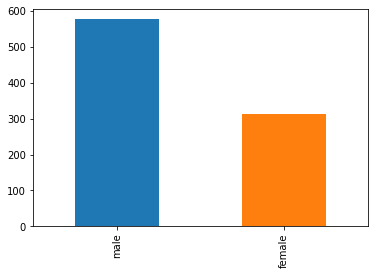

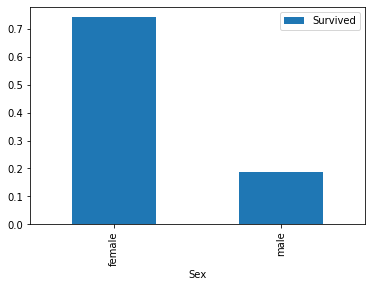

In [5]:
#data_exploration
#sex
print(train.Sex.describe())
sex_pivot = train.pivot_table(values=['Survived'], index=['Sex'])
print(sex_pivot)
train.Sex.value_counts().plot.bar()
sex_pivot.plot.bar()
plt.show()  
#print(train['Age'].describe())
#print(train['Embarked'].describe()) #women are more likely to survive

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


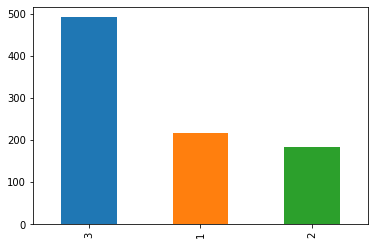

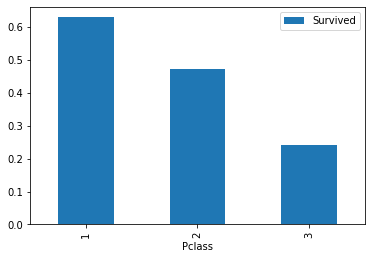

In [6]:
#Pclass
print(train.Pclass.describe())
print(train.Pclass.value_counts())
Pclass_pivot = train.pivot_table(index=['Pclass'], values= ['Survived'])
print(Pclass_pivot)
train.Pclass.value_counts().plot.bar()
Pclass_pivot.plot.bar()
plt.show()


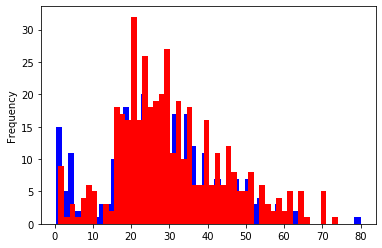

In [7]:
#Age   #We will divide age into columns using cut function
                             #count is 714 i.e. less than 891
survived = train[train['Survived']==1]
died = train[train['Survived']==0]
survived.Age.plot.hist(color='blue', bins = 50)
died.Age.plot.hist(color = 'red', bins = 50)                #in some age groups more people survived than died

          Survived
cut_age           
Missing   0.293785
Infant    0.704545
Child     0.407407
Teenager  0.397849
Young     0.384384
Adult     0.400000
Old       0.227273


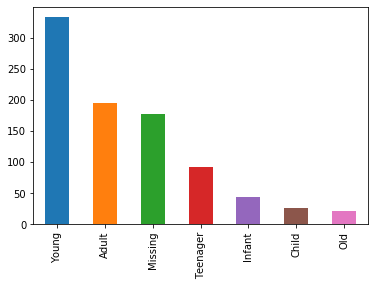

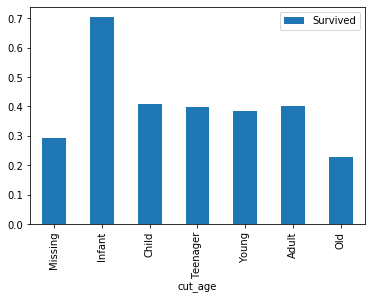

In [8]:
#Age
train['Age']= train['Age'].fillna(-0.5)
test['Age']= test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 13 , 19 , 35 , 60, 100]
label = ['Missing', 'Infant', 'Child', 'Teenager', 'Young', 'Adult', 'Old']
#print(len(label) == len(bins) - 1)
train['cut_age'] = pd.cut(train.Age,bins, labels= label )
test['cut_age'] = pd.cut(test.Age,bins, labels= label )
#print(train.head())
cut_age_pivot= train.pivot_table(values = ['Survived'], index= ['cut_age'])
train.cut_age.value_counts().plot.bar()
cut_age_pivot.plot.bar() 
print(cut_age_pivot)
                                                            #survival rate of certain class is more than  other

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


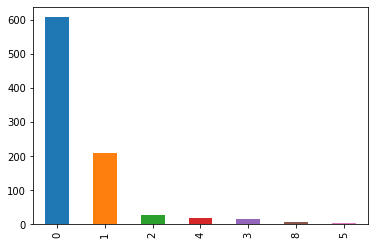

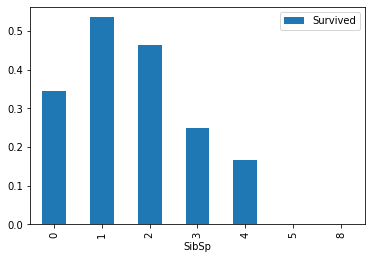

In [9]:
#SibSp
print(train.SibSp.describe())
train.SibSp.value_counts().plot.bar()
train.pivot_table(values = 'Survived' , index = 'SibSp').plot.bar()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


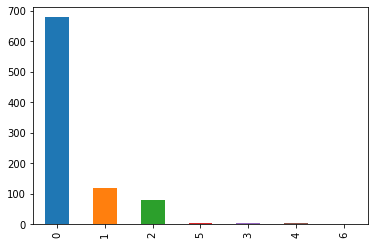

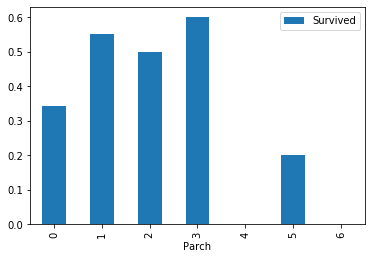

In [10]:
#Parch
print(train.SibSp.describe())
train.Parch.value_counts().plot.bar()
train.pivot_table(values = 'Survived' , index = 'Parch').plot.bar()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


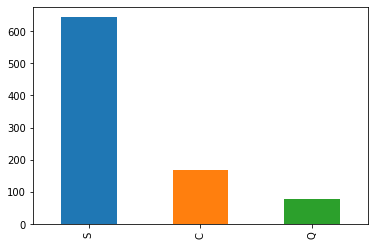

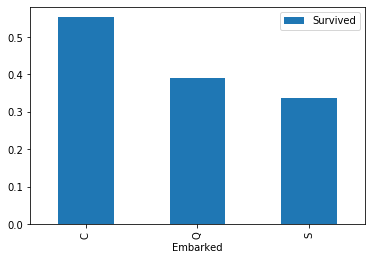

In [11]:
#Embarked
print(train.SibSp.describe())
train.Embarked.value_counts().plot.bar()
train.pivot_table(values = 'Survived' , index = 'Embarked').plot.bar()
train['Embarked'] = train['Embarked'].fillna('C')

In [12]:
#PREPARING DATA FOR MACHINE LEARNING
train_final = train
test_final  = test

for column in ['cut_age', 'Pclass', 'Sex', 'Embarked']:
        dummies = pd.get_dummies(train[column], prefix=column)
        train_final = pd.concat([train_final , dummies], axis = 1) 
        
for column in ['cut_age', 'Pclass', 'Sex', 'Embarked']:
        dummies = pd.get_dummies(test[column], prefix=column)
        test_final = pd.concat([test_final , dummies], axis = 1)       

#print(len(train_final.columns.tolist()))        
train_final.columns.tolist()
        

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'cut_age',
 'cut_age_Missing',
 'cut_age_Infant',
 'cut_age_Child',
 'cut_age_Teenager',
 'cut_age_Young',
 'cut_age_Adult',
 'cut_age_Old',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [13]:
#CREATING MACHINE LEARNING MODEL
#LOGISTIC REGRESSION MODEL

def sigmoid(z):
    return 1/(1+ np.exp(-z))
              

In [14]:
def h(theta, X):
     z = np.dot(X, theta)
     return sigmoid(z)
#h(np.array([1,1]), np.array([[1,1],[2,2]]))

In [15]:
def cost_function(h, y,m):
    J = -(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))/m
    return float(J)

def gradient_descent(initial_theta, alpha,y,X):
    theta = initial_theta
    h1 = h(theta, X)
    J = cost_function(h1,y)
    while (J> 10**(-3)) :
        theta -= alpha*np.dot(X.T, (h1-y))/m
        h1 = h(theta, X)
        J = cost_function(h1,y)
    return theta   
    
            

def predict(theta, X):
    h_final = h(theta, X)
    for i in range(m):
       if(h_final[i]>=0.5):
            h_final[i] = 1
       else :
            h_final[i] = 0
    return h_final        
            

In [33]:
dummies_train = pd.get_dummies(train['cut_age'], prefix = 'age')
dummies_test = pd.get_dummies(test['cut_age'], prefix = 'age')
tr_final = pd.concat([train , dummies_train], axis=1)
ts_final = pd.concat([test, dummies_test], axis=1)

In [34]:
tr_final= tr_final.drop(columns='cut_age')
ts_final= ts_final.drop(columns='cut_age')

In [35]:
temp = tr_final.loc[:, 'age_Missing':'age_Old']
tr_final = tr_final[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
tr_final = pd.concat([tr_final, temp], axis =1)
#tr_final

In [36]:
temp = ts_final.loc[:, 'age_Missing':'age_Old']
ts_final = ts_final[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
ts_final = pd.concat([ts_final, temp], axis =1)
#ts_final


In [37]:
tr_final.loc[tr_final.Sex=='male', 'Sex'] = 0
tr_final.loc[tr_final.Sex=='female', 'Sex'] = 1
#tr_final
        

In [38]:
ts_final.loc[ts_final.Sex=='male', 'Sex'] = 0
ts_final.loc[ts_final.Sex=='female', 'Sex'] = 1
#ts_final        

In [39]:
tr_final.loc[tr_final['Embarked']=='S' , 'Embarked'] = 0
tr_final.loc[tr_final['Embarked']=='Q', 'Embarked'] = 1
tr_final.loc[tr_final['Embarked']=='C', 'Embarked'] = 2
#tr_final       

In [40]:
ts_final.loc[ts_final['Embarked']=='S' , 'Embarked'] = 0
ts_final.loc[ts_final['Embarked']=='Q', 'Embarked'] = 1
ts_final.loc[ts_final['Embarked']=='C', 'Embarked'] = 2
#ts_final       


(891,)

In [64]:
h1 = h(initial_theta, X)
y = train['Survived'].values
y=y.reshape(891,1)


In [68]:
X1 = tr_final.values
X = np.ones((891,13))
X[:,1:] =X1
initial_theta = np.zeros((13,1))
#h1 = h(initial_theta, X)
alpha = 0.0001
#y = train['Survived'].values

theta = initial_theta
for i in range(500000) :
    theta = theta - (alpha*np.dot(X.T, (h1-y)))/891
    h1 = h(theta, X)        
        

In [69]:
theta

array([[ 0.32729132],
       [-0.78281441],
       [ 2.27111334],
       [-0.20727869],
       [ 0.01702797],
       [ 0.31754019],
       [-0.17286871],
       [ 0.66115121],
       [ 0.08593998],
       [ 0.03358118],
       [ 0.12552473],
       [-0.21976922],
       [-0.18626785]])

In [70]:
final =h(theta, X)
#final

In [71]:
for i in range(891):
       if(final[i]>=0.5):
            final[i] = 1
       else :
            final[i] = 0
final            
accuracy = final[final == y].shape[0]/891
accuracy

0.8035914702581369

In [72]:
X1 = ts_final.values
X = np.ones((418,13))
X[:,1:] =X1
output = h(theta, X)
for i in range(418):
       if(output[i]>=0.5):
            output[i] = 1
       else :
            output[i] = 0          
output = output.astype(int)
output

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [73]:
output_final = pd.concat([test['PassengerId'], pd.DataFrame(output,columns= ['Survived'])], axis=1)
output_final.to_csv('output_final1.csv', index=False)